In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Preprocessing Stage
import pandas as pd
import numpy as np
import sys

# Import dataset
dataset = pd.read_csv('/content/Purpose-of-Visit-by-Port-and-Country-JTB-Open-data-request.csv')

# Ubah row dataset di kolom 'Number of Visitors' yang kosong menjadi mean-nya
meanDS = dataset['Number of Visitors'].mean()
for index, row in dataset.iterrows():
  if dataset.loc[index, ('Number of Visitors')] is None:
    dataset.loc[index, ('Number of Visitors')] = meanDS

# Hilangkan row yang kosong
dataset = dataset.dropna()

# Ubah string menjadi label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dataset.loc[:, ('Port of Entry')])
dataset.loc[:, ('Port of Entry')] = le.transform(dataset.loc[:, ('Port of Entry')])
le.fit(dataset.loc[:, ('Type of Visit')])
dataset.loc[:, ('Type of Visit')] = le.transform(dataset.loc[:, ('Type of Visit')])
le.fit(dataset.loc[:, ('Origin')])
dataset.loc[:, ('Origin')] = le.transform(dataset.loc[:, ('Origin')])
le.fit(dataset.loc[:, ('Month')])
dataset.loc[:, ('Month')] = le.transform(dataset.loc[:, ('Month')])

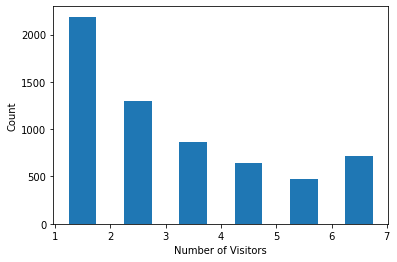

,Port of Entry,Type of Visit,Origin,Month,Number of Visitors
6337,0,8,67,3,0.0
11918,1,0,66,7,0.0
1034,0,0,20,7,1.0
9746,0,11,39,7,1.0
9014,0,10,64,7,0.0
14304,1,4,44,4,1.0
15137,1,6,53,6,0.0
14681,1,4,78,6,0.0
14169,1,4,32,10,1.0
1303,0,0,43,1,0.0


In [3]:
# 2. Checking data anomalies

# Histogram dari 'Number of Visitors'
from matplotlib import pyplot as plt
plt.hist(dataset['Number of Visitors'], bins=6, rwidth=0.5, range=[1, 7])
plt.xlabel('Number of Visitors')
plt.ylabel('Count')
plt.show()

# Menghilangkan outlier dengan percentile technique dan zscore
lower_limit, upper_limit = dataset.loc[:, ('Number of Visitors')].quantile([0.001, 0.999])
dataset2 = dataset[(dataset.loc[:, ('Number of Visitors')] < upper_limit) & (dataset.loc[:, ('Number of Visitors')] > lower_limit)]
dataset2.loc[:, ('zscore')] = (dataset2.loc[:, ('Number of Visitors')] - dataset2.loc[:, ('Number of Visitors')].mean() ) / dataset2.loc[:, ('Number of Visitors')].std()
dataset3 = dataset2[(dataset2.loc[:, ('zscore')] > -1.1) & (dataset2.loc[:, ('zscore')] < 1.1)]

# Karena angka pengunjung menaik di angka 6, maka angka 6 menjadi batasan
for index, row in dataset3.iterrows():
  if dataset3['Number of Visitors'].loc[index] > 6:
    dataset3['Number of Visitors'].loc[index] = 1
  else:
    dataset3['Number of Visitors'].loc[index] = 0

# Hapus kolom zscore
dataset3 = dataset3.drop('zscore', 1)
dataset3.sample(10)

In [4]:
# 3. Selecting Algorithms in solving problems (Clustering or Classification).

# Pisah kolom 'Number of Visitors' dengan kolom lainnya
X = dataset3.iloc[:, :-1].values
y = dataset3.iloc[:, -1].values

# Split menjadi train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=5)

# Train model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3) 
model.fit(X_train, y_train)
prediction = model.predict(X_test)

from sklearn import metrics
print('Accuracy of KNN is:', metrics.accuracy_score(y_test, prediction))

Accuracy of KNN is: 0.7245045915901401


In [ ]:
#Simpan model
from joblib import dump
with open('model.pkl', 'wb') as file:
  dump(model, file)